In [1]:
using Pkg, Revise
Pkg.activate("/home/jovyan/elementary-linear-algebra/GenLinAlgProblems")
using GenLinAlgProblems, LinearAlgebra, RowEchelon, Latexify, LaTeXStrings, SymPy, Random

function p(d,intA)
    if d==1 return [ intA ] else return [ 1//d, intA] end
end
;

  Activating project at `~/elementary-linear-algebra/GenLinAlgProblems`


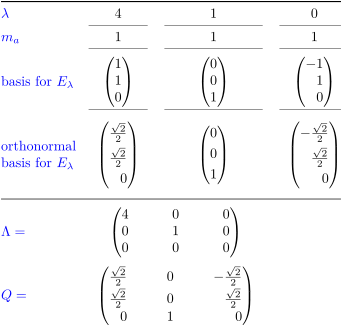

In [2]:
A=[2 2 0; 2 2 0;0 0 1]
l_show( L"A = ", A, L"\quad p(\lambda) = %$(charpoly(A))" )

nM.show_eig_tbl(A,normal=true, fig_scale=1.4, mmLambda=11, color="blue", tmp_dir="../tmp" )

eigvals: 3
eigvecs: 3
orthog:  2
L     :  1
Q     :  1    inconsistent: -3

In [3]:
A=[1 2; 0 0;1 -2]
l_show(L"A =", A, L"\quad A^t A =", A'A, L", \quad A A^t = ", A*A')

L"\[A = \begin{pmatrix}
1 & 2 \\
0 & 0 \\
1 & -2
\end{pmatrix} \quad A^t A = \begin{pmatrix}
2 & 0 \\
0 & 8
\end{pmatrix} , \quad A A^t =  \begin{pmatrix}
5 & 0 & -3 \\
0 & 0 & 0 \\
-3 & 0 & 5
\end{pmatrix}\]
"

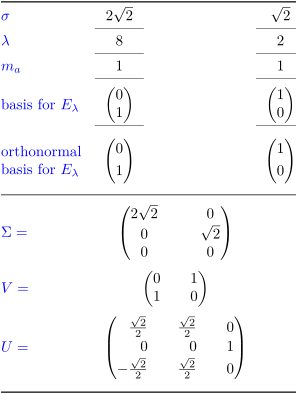

In [4]:
nM.show_svd_table(A, mmS=7, fig_scale=1.5, mmLambda=10, tmp_dir="tmp")

eigvals: 2
eigvecs: 2
Orthog:  1
Sigma:   1
V:       1
U:       2+1   1/sigma A v  x2, ortho +1

<div style="float:center;width:100%;text-align:center;">
<strong style="height:100px;color:darkred;font-size:40px;">Problem Review</strong>
</div>

#### To use this notebook
* hit <Ctrl-Enter> in a cell that defines a matrix.<br>
until you see a matrix problem you like
* hit <Ctrl-Enter> in the next cell to display the solution<br>
(hitting <Ctrl-Enter> a second time gets rid of the warning:<br>
I got rid of this by running the same command twice!
)

**GE/GJ problem definition:** variables are size $M\times N$, rank $r$

**Eigenproblem definition:** variables are a list of eigenvalues

# 1. GE/GJ Problems

## 1.1 GE

In [5]:
M=3; N=5; r=2
# --------------------------------------------------------
A,X,B = gen_gj_pb(M,N,r; maxint=2, pivot_in_first_col=true, num_rhs=1,has_zeros=true)
pb_ge = ShowGe{Rational{Int}}( A,  Matrix(one(eltype(A))I(M)), tmp_dir="tmp")
l_show( L"A =", A, L"\quad b=", B, inline=true)

L"$A = \begin{pmatrix}
1 & -1 & 2 & 0 & 1 \\
-2 & 2 & -4 & -1 & -4 \\
2 & -2 & 4 & 2 & 6
\end{pmatrix} \quad b= \begin{pmatrix}
1 \\
-2 \\
2
\end{pmatrix}$
"

In [6]:
#show_system( pb_ge, b_col=1 )

No GUI available, some actions may fail

** (inkscape:16895): WARNING **: 04:27:21.914: Failed to wrap object of type 'GtkRecentManager'. Hint: this error is commonly caused by failing to call a library init() function.


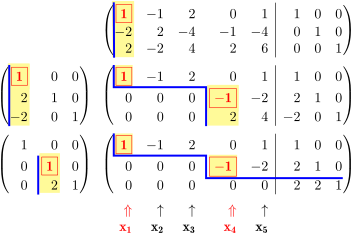

In [7]:
ref!(pb_ge)
show_layout!(pb_ge, fig_scale=1.4)
show_layout!(pb_ge, fig_scale=1.4)

### **What can we do with GE?**

#### Read out the following Information
* solve $A x = b$;  particular solution/homogeneous solution
* LU decomposition / solve L U x = b with forward/backward steps
* bases for the fundamental subspaces ($\mathscr{N}(A)$ requires solving $A x = 0$.
* find linear dependent/independent vectors

No GUI available, some actions may fail

** (inkscape:16919): WARNING **: 04:27:24.129: Failed to wrap object of type 'GtkRecentManager'. Hint: this error is commonly caused by failing to call a library init() function.


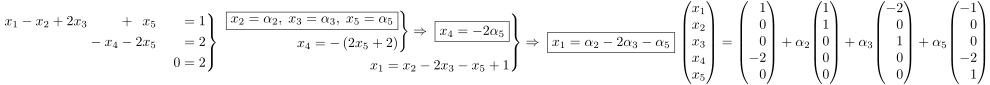

In [8]:
show_backsubstitution!(pb_ge, b_col=1, fig_scale=1.4)
show_backsubstitution!(pb_ge, b_col=1, fig_scale=1.4)

### 1.1.2 Special Case Normal Equation
* least squares solution  (note: the problem may be defined in terms of a table)

In [9]:
M=3; N=4; r=2
A,X,B = gen_gj_pb(M,N,r; maxint=2, pivot_in_first_col=true, num_rhs=1,has_zeros=true)
pb_least_squares = ShowGe{Rational{Int}}( A, B, tmp_dir="tmp")
l_show( L"A =", A, L"\quad b=", B, inline=true)

L"$A = \begin{pmatrix}
-2 & 2 & -4 & 2 \\
-4 & 4 & -6 & 2 \\
0 & 0 & -4 & 4
\end{pmatrix} \quad b= \begin{pmatrix}
10 \\
16 \\
8
\end{pmatrix}$
"

No GUI available, some actions may fail

** (inkscape:16955): WARNING **: 04:27:32.040: Failed to wrap object of type 'GtkRecentManager'. Hint: this error is commonly caused by failing to call a library init() function.


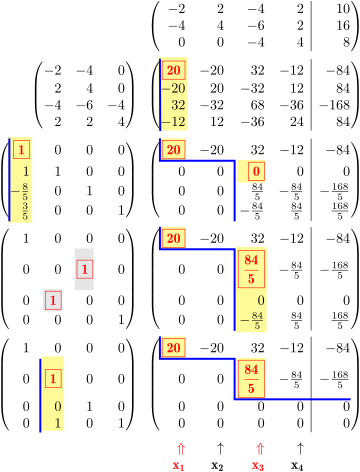

In [10]:
ref!(pb_least_squares, normal_eq=true)
show_layout!(pb_least_squares, fig_scale=1.4)
show_layout!(pb_least_squares, fig_scale=1.4)

No GUI available, some actions may fail

** (inkscape:16979): WARNING **: 04:27:33.787: Failed to wrap object of type 'GtkRecentManager'. Hint: this error is commonly caused by failing to call a library init() function.


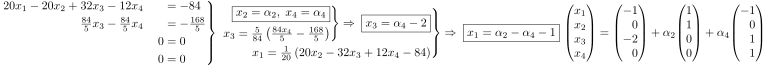

In [11]:
show_backsubstitution!(pb_least_squares, b_col=1, fig_scale=1.2)
show_backsubstitution!(pb_least_squares, b_col=1, fig_scale=1.2)

### 1.1.3 Special Case A square of size $N \times N$

* could remove cols in a GE pb to make A square
  * find the determinant
  * find the inverse

In [12]:
M=3; N=3; r=3; num_rhs=0
A,X,B = gen_gj_pb(M,N,r; maxint=2, pivot_in_first_col=true, num_rhs=num_rhs,has_zeros=true)

pb_square = ShowGe{Rational{Int}}( A,  [B I], tmp_dir="tmp")
l_show( L"A =", A, inline=true) #, L"\quad b=", B, inline=true)

L"$A = \begin{pmatrix}
2 & 0 & -2 \\
0 & -1 & 2 \\
-4 & -2 & 7
\end{pmatrix}$
"

No GUI available, some actions may fail

** (inkscape:17006): WARNING **: 04:27:39.130: Failed to wrap object of type 'GtkRecentManager'. Hint: this error is commonly caused by failing to call a library init() function.


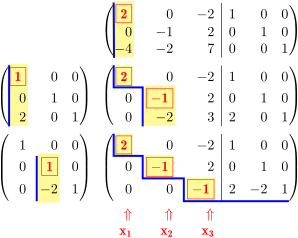

In [13]:
ref!(pb_square)
show_layout!(pb_square, fig_scale=1.4)
show_layout!(pb_square, fig_scale=1.4)

## 1.2 GJ

In [14]:
M=3; N=3; r=3
A,X,B = gen_gj_pb(M,N,r; maxint=2, pivot_in_first_col=true, num_rhs=1,has_zeros=true)

pb_gj = ShowGe{Rational{Int}}( A,  Matrix(one(eltype(A))I(M)), tmp_dir="tmp")
l_show( L"A =", A, L"\quad b=", Matrix(one(eltype(A))I(M)), inline=true)

L"$A = \begin{pmatrix}
-1 & -2 & 4 \\
-2 & -2 & 8 \\
1 & 2 & -6
\end{pmatrix} \quad b= \begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}$
"

#### What Can we do with GJ?
* find rref(A)
* solve $A x = b$
* CR decomposition
* Inverse

No GUI available, some actions may fail

** (inkscape:17040): WARNING **: 04:27:44.746: Failed to wrap object of type 'GtkRecentManager'. Hint: this error is commonly caused by failing to call a library init() function.


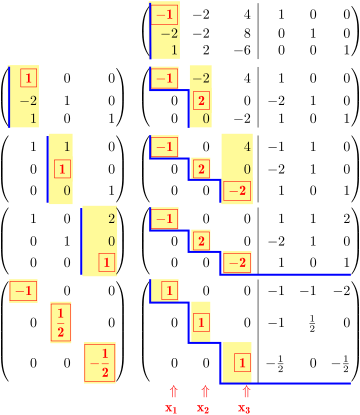

In [15]:
ref!(pb_gj, gj=true)
show_layout!(pb_gj, fig_scale=1.4)
show_layout!(pb_gj, fig_scale=1.4)

No GUI available, some actions may fail

** (inkscape:17057): WARNING **: 04:27:46.183: Failed to wrap object of type 'GtkRecentManager'. Hint: this error is commonly caused by failing to call a library init() function.


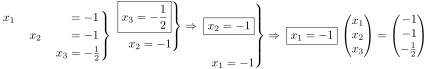

In [16]:
show_backsubstitution!(pb_gj, b_col=1, fig_scale=1.2)
show_backsubstitution!(pb_gj, b_col=1, fig_scale=1.2)

# 2. QR

In [17]:
#A = gen_qr_problem(4; maxint=2)
A = gen_qr_problem_3(maxint=2)
A = A[:,1:3]
l_show(L"A =", A, inline=true)

L"$A = \begin{pmatrix}
0 & 0 & 1 \\
-12 & 5 & -17 \\
5 & 12 & -7
\end{pmatrix}$
"

No GUI available, some actions may fail

** (inkscape:17089): WARNING **: 04:27:50.048: Failed to wrap object of type 'GtkRecentManager'. Hint: this error is commonly caused by failing to call a library init() function.


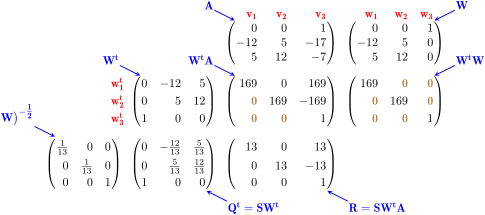

In [18]:
W   = gram_schmidt_w(A)
h,m = nM.gram_schmidt_qr(A, W, fig_scale=1.2, tmp_dir="tmp")
h

# 3. Eigenproblems

## 3.1 General Case

In [19]:
S,Λ,Sinv,A = gen_eigenproblem([-2,-2,0])
d,intA     = factor_out_denominator(A)

l_show( L"A = ", p(d,intA)..., L"\qquad p(\lambda) = %$(charpoly(A))", inline=true )

L"$A =  \begin{pmatrix}
-2 & 0 & 0 \\
16 & -6 & 4 \\
24 & -6 & 4
\end{pmatrix} \qquad p(\lambda) = -λ^3 - 4*λ^2 - 4*λ$
"

No GUI available, some actions may fail

** (inkscape:17105): WARNING **: 04:27:52.516: Failed to wrap object of type 'GtkRecentManager'. Hint: this error is commonly caused by failing to call a library init() function.


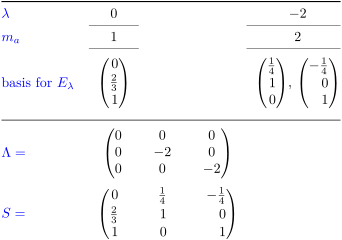

In [20]:
nM.show_eig_tbl(intA,Ascale=d, fig_scale=1.4, tmp_dir="tmp" )
nM.show_eig_tbl(intA,Ascale=d, fig_scale=1.4, tmp_dir="tmp" )

## 3.2 Failure

In [21]:
A       = gen_non_diagonalizable_eigenproblem(2,0)
d,intA  = factor_out_denominator(A)

l_show( L"A = ", p(d,intA)..., L"\qquad p(\lambda) = %$(charpoly(A))", inline=true )

L"$A =  \begin{pmatrix}
-18 & 13 & 6 \\
-40 & 28 & 12 \\
26 & -17 & -6
\end{pmatrix} \qquad p(\lambda) = -λ^3 + 4*λ^2 - 4*λ$
"

No GUI available, some actions may fail

** (inkscape:17129): WARNING **: 04:27:53.936: Failed to wrap object of type 'GtkRecentManager'. Hint: this error is commonly caused by failing to call a library init() function.


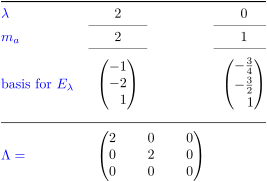

In [22]:
nM.show_eig_tbl(intA,Ascale=d, fig_scale=1.4, tmp_dir="tmp" )
nM.show_eig_tbl(intA,Ascale=d, fig_scale=1.4, tmp_dir="tmp" )

## 3.3 Symmetric Matrix

In [23]:
S,Λ,A   = gen_symmetric_eigenproblem([2,1,0], maxint=2)
d,intA  = factor_out_denominator(A)

l_show( L"A = ", p(d,intA)..., L"\qquad p(\lambda) = %$(charpoly(A))", inline=true )

L"$A =  \frac{1}{289} \begin{pmatrix}
289 & 0 & 0 \\
0 & 450 & 240 \\
0 & 240 & 128
\end{pmatrix} \qquad p(\lambda) = -λ^3 + 3*λ^2 - 2*λ$
"

No GUI available, some actions may fail

** (inkscape:17154): WARNING **: 04:27:56.424: Failed to wrap object of type 'GtkRecentManager'. Hint: this error is commonly caused by failing to call a library init() function.


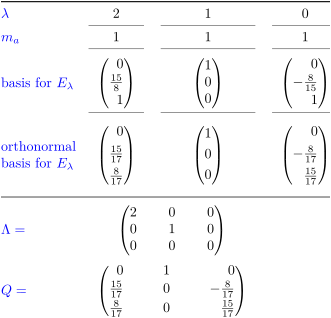

In [24]:
nM.show_eig_tbl(intA,Ascale=d,normal=true, fig_scale=1.4, tmp_dir="tmp" )
nM.show_eig_tbl(intA,Ascale=d,normal=true, fig_scale=1.4, tmp_dir="tmp" )

## 3.4 Functions of a Matrix

Eigendecomposition $A = S \Lambda S^{-1} \Rightarrow A^n = S \Lambda^n S^{-1}$

## 3.5 SVD

In [25]:
M=3; N=[3,1]; sigmas=[1,-1]   # by splitting N or M into a list of integers
#                             # the matrices become simpler. Here M=3, N=3+1
# ------------------------------------------------------------
U,Σ,Vt,A = gen_svd_problem(3, [3,1],  [1,-1],  maxint=2)
dA,intA   = factor_out_denominator(A)
dU,intU   = factor_out_denominator(U)
dVt,intVt = factor_out_denominator(Vt)

l_show(L"A = ", p(dA, intA)..., L", \qquad A^{t} A =", p((dA)^2, intA'intA)..., inline=true )

L"$A =  \frac{1}{35} \begin{pmatrix}
-15 & -30 & 0 & -10 \\
-6 & 9 & 0 & -18 \\
-8 & 12 & 0 & -24
\end{pmatrix} , \qquad A^{t} A = \frac{1}{1225} \begin{pmatrix}
325 & 300 & 0 & 450 \\
300 & 1125 & 0 & -150 \\
0 & 0 & 0 & 0 \\
450 & -150 & 0 & 1000
\end{pmatrix}$
"

No GUI available, some actions may fail

** (inkscape:17178): WARNING **: 04:27:59.719: Failed to wrap object of type 'GtkRecentManager'. Hint: this error is commonly caused by failing to call a library init() function.


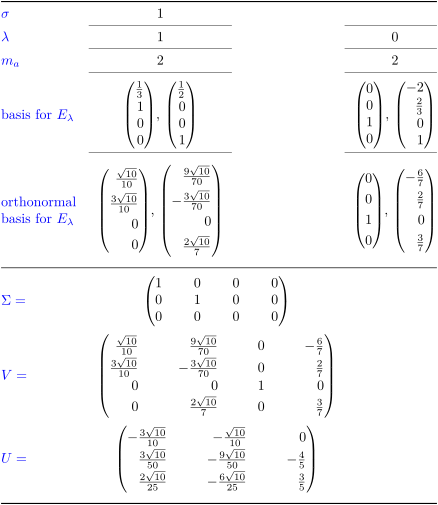

In [26]:
nM.show_svd_table(intA, Ascale=dA, fig_scale=1.4, tmp_dir="tmp")

#### PseudoInverse

In [27]:
r    = length(sigmas)
U_r  = U[:,1:r];   dU_r,intU_r = factor_out_denominator(U_r)
V_r  = Matrix(Vt[1:r,:]'); dV_r,intV_r = factor_out_denominator(V_r)
Σ_r  = Σ[1:r,1:r]
dinvΣ_r, invΣ_r = factor_out_denominator(Matrix(Diagonal([1//k for k in diag(Σ_r)])))
pinv_A = V_r * dinvΣ_r * invΣ_r * U_r'
dpinv_A, intpinv_A = factor_out_denominator(pinv_A)

l_show( L"A^\dagger = V_r \Sigma_r^{-1} U_r^t = ",
        p(dV_r,intV_r)..., p(dinvΣ_r, invΣ_r)..., p(dU_r, Matrix(intU_r'))...,
        L"= ", p(dpinv_A, intpinv_A)...,
    inline=true)


L"$A^\dagger = V_r \Sigma_r^{-1} U_r^t =  \frac{1}{7} \begin{pmatrix}
3 & 2 \\
6 & -3 \\
0 & 0 \\
2 & 6
\end{pmatrix} \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix} \frac{1}{5} \begin{pmatrix}
-5 & 0 & 0 \\
0 & 3 & 4
\end{pmatrix} =  \frac{1}{35} \begin{pmatrix}
-15 & -6 & -8 \\
-30 & 9 & 12 \\
0 & 0 & 0 \\
-10 & -18 & -24
\end{pmatrix}$
"

In [28]:
@show Float64.(pinv_A) ≈ pinv(A);

Float64.(pinv_A) ≈ pinv(A) = true
